Normal imports

In [1]:
import numpy as np
import pandas as pd
import os
import trackml
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Importing the detector tools of our github repository

In [2]:
from tools.detector import *
#from tools.plot_detector_tools import *
detector=Detector("../detectors.csv")

Importing the trackml libraries

In [3]:
from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event

loading first 9 events

In [4]:
event_prefix ='event00000100'
NR_ev=9
hits=[]
cells=[]
particles=[]
truth=[]
for i in np.arange(NR_ev):
    hits.append(load_event(os.path.join('../train_100_events/', event_prefix+str(i)))[0])
    cells.append(load_event(os.path.join('../train_100_events/', event_prefix+str(i)))[1])
    particles.append(load_event(os.path.join('../train_100_events/', event_prefix+str(i)))[2])
    truth.append(load_event(os.path.join('../train_100_events/', event_prefix+str(i)))[3])

finding a the unique particle ids gives the number of tracks

In [5]:
unique_particle_id = np.empty(NR_ev,dtype=object)
for i in np.arange(NR_ev):
    unique_particle_id[i] = np.unique(truth[i].values[:,1])

In [74]:
# in principle not needed for the plots (and lengthy to evaluate)
trackhitslist=np.empty(NR_ev,dtype=object)
for i in np.arange(NR_ev):
    trackhitslist[i] = [truth[i].values[truth[i].values[:,1] == unique_id,0] for unique_id in unique_particle_id[i]]

list of list of hit_ids that belong to the same particle_id. entry 0 is for particle_id==0, i.e. "shithits" not associated to a track

In [6]:
shithitslist = np.empty(NR_ev,dtype=object)
for i in np.arange(NR_ev):
    shithitslist[i]=truth[i].values[truth[i].values[:,1]==0,0]

volume_hitslist[i] gives the list of hit_ids for a given volume of event i

0:    7

1:    8

2:    9

3:   12

4:   13

5:   14

6:   16

7:   17

8:   18

In [7]:
unique_volume_id=np.empty(NR_ev,dtype=object)
volume_hitslist=np.empty(NR_ev,dtype=object)
for i in np.arange(NR_ev):
    unique_volume_id[i]=np.unique(hits[i].values[:,4])
    volume_hitslist[i] = [hits[i].values[hits[i].values[:,4] == volume_id,0] for volume_id in unique_volume_id[i]]

cells_hit[j][i] and cells_shithit[j][i] gives an object like cells, but only with entries of volume[i] and containing (shit)hits of event j

In [10]:
cells_hit=np.empty(NR_ev,dtype=object)
cells_shithit=np.empty(NR_ev,dtype=object)

for ev in np.arange(NR_ev):
    cells_hit[ev] = [cells[ev][cells[ev]['hit_id'].isin(volume_hitslist[ev][i]) & ~cells[ev]['hit_id'].isin(shithitslist[ev]) ]for i in np.arange(9)]
    cells_shithit[ev] = [cells[ev][cells[ev]['hit_id'].isin(volume_hitslist[ev][i]) & cells[ev]['hit_id'].isin(shithitslist[ev])] for i in np.arange(9)]
    # progress:
    print(ev)

0
1
2
3
4
5
6
7
8


cells_hit_ch[ev][i][j] and cells_shithit_ch[ev][i][j] are now specified for volume i and hit_id j in event [ev]. Takes long to evaluate

In [11]:
cells_hit_ch=np.empty(NR_ev,dtype=object)
cells_shithit_ch=np.empty(NR_ev,dtype=object)
for ev in np.arange(NR_ev):
    cells_hit_ch[ev]=[[cells_hit[ev][j][cells_hit[ev][j]['hit_id'].isin([i])]for i in np.unique(cells_hit[ev][j].values[:,0])] for j in np.arange(9)]
    cells_shithit_ch[ev]=[[cells_shithit[ev][j][cells_shithit[ev][j]['hit_id'].isin([i])]for i in np.unique(cells_shithit[ev][j].values[:,0])] for j in np.arange(9)]
    #progress:
    print(ev)

0
1
2
3
4
5
6
7
8


# Now the plots
I have the code for each plot separately. This is not the fastest method, but useful if we are interested in just one of the plots at a time

first, Number of Cells lit up

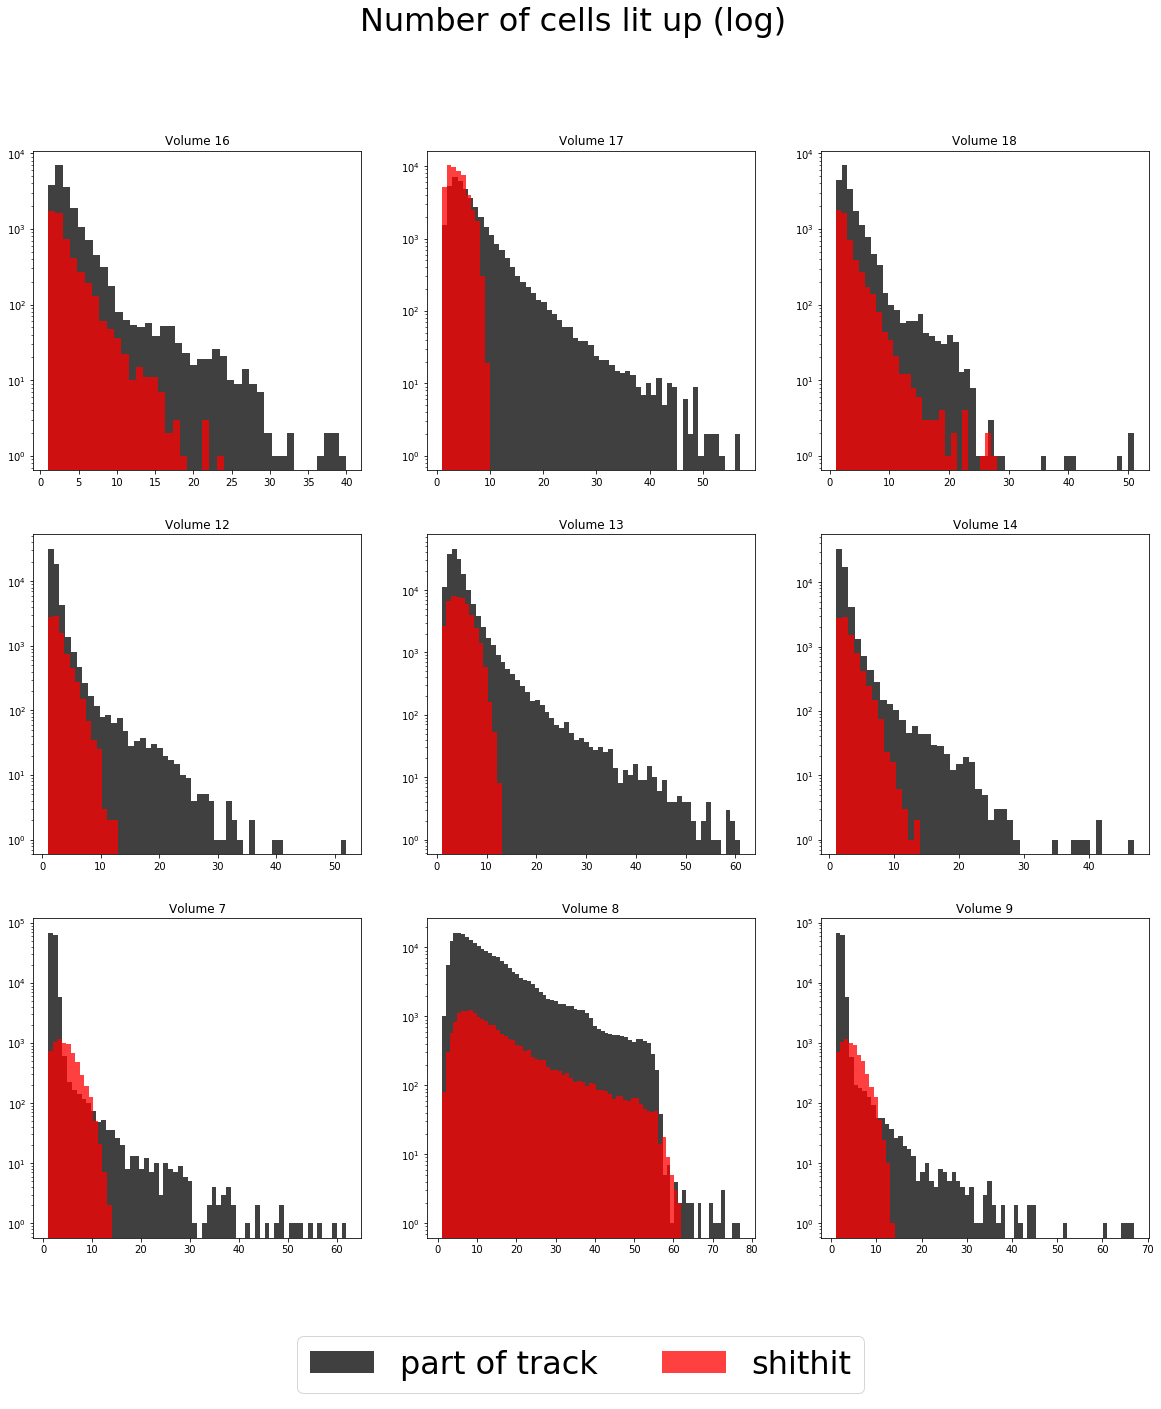

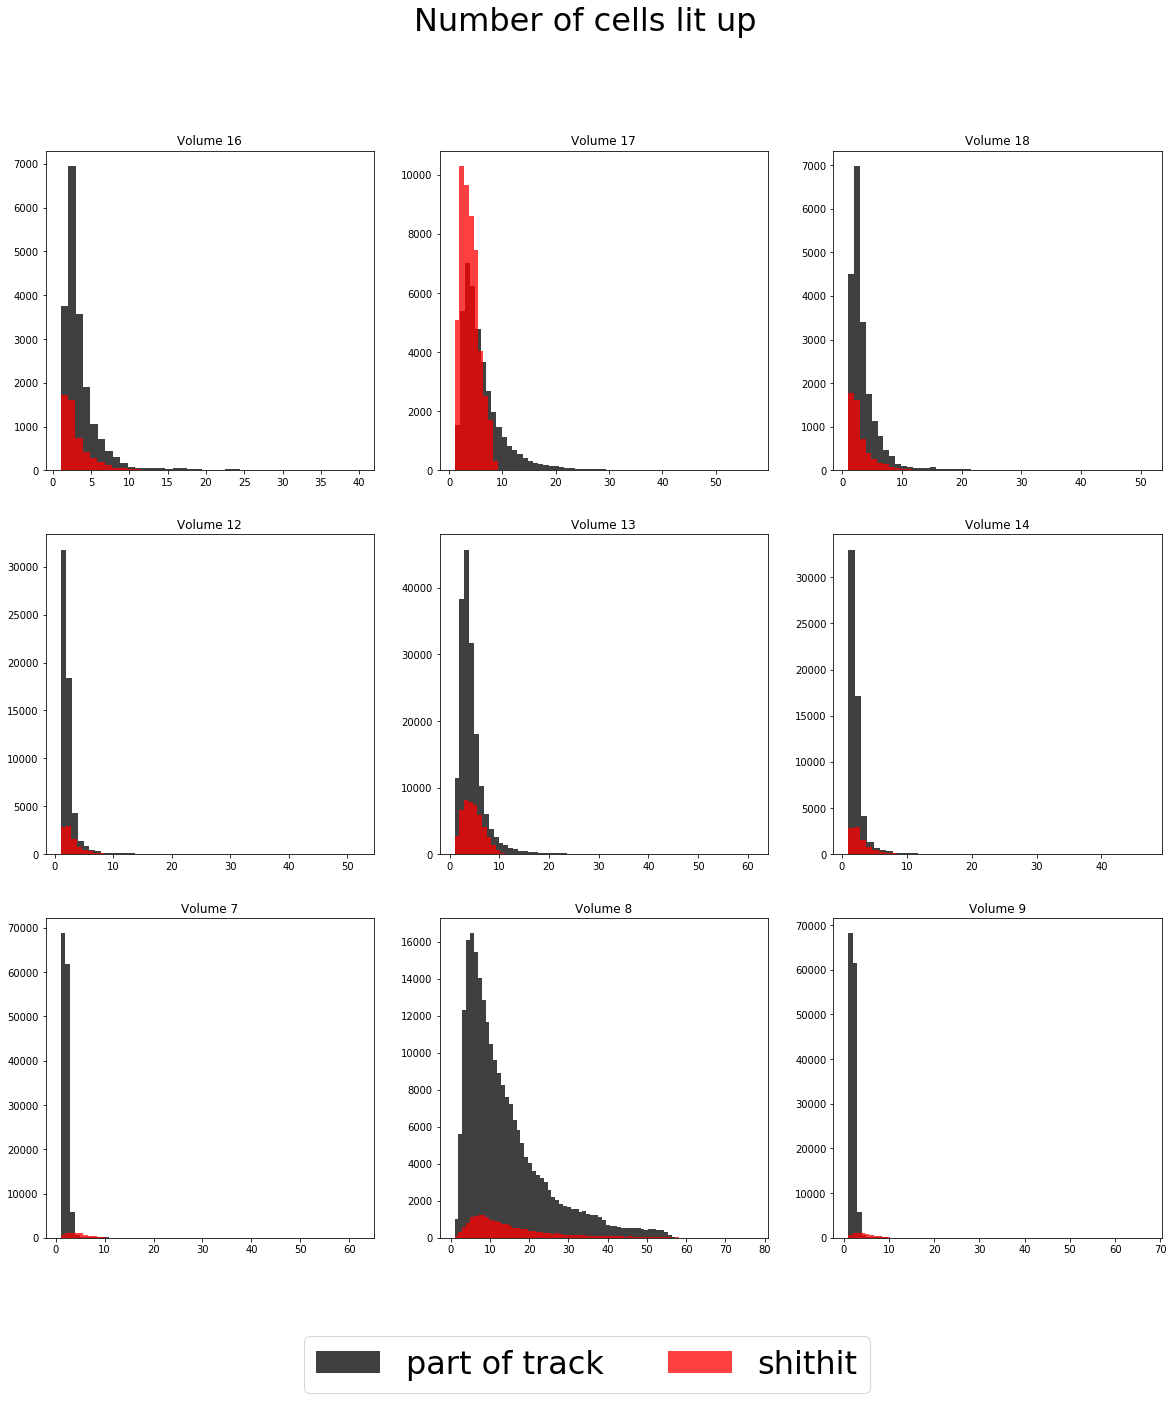

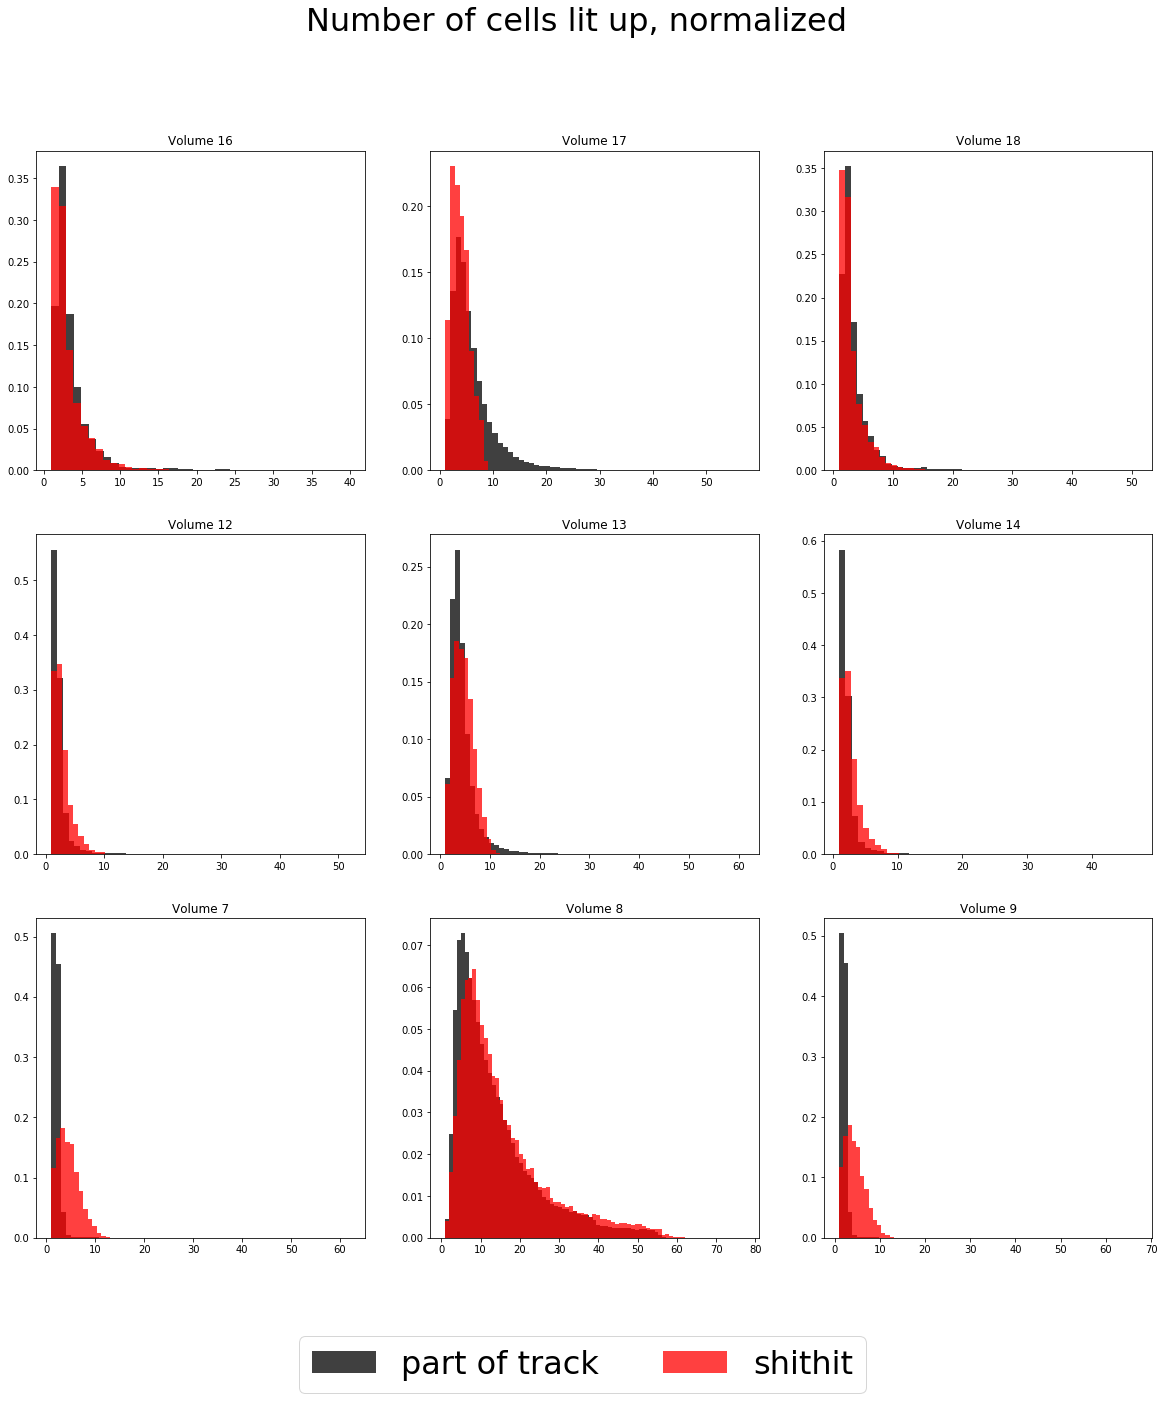

In [10]:
plt.figure(figsize=(20,20),facecolor='white')
plt.suptitle("Number of cells lit up (log)",fontsize=32)
volume=0
plotorder=[7,8,9,4,5,6,1,2,3]
volume_name=["7","8","9","12","13","14","16","17","18"]
for i in plotorder:
    plt.subplot(3,3,i)
    plt.yscale('log')
    hit_nr_ch=[]
    shithit_nr_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_nr_ch=np.append(hit_nr_ch,len(cells_hit_ch[ev][volume][j]))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_nr_ch=np.append(shithit_nr_ch,len(cells_shithit_ch[ev][volume][j]))
    plt.hist(hit_nr_ch,int(hit_nr_ch.max()),fc='k',label='trackhit',alpha=0.75)
    plt.hist(shithit_nr_ch,int(shithit_nr_ch.max()),fc='r',label='shithit',alpha=0.75)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc="lower center",ncol=2,fontsize=32)

plt.figure(figsize=(20,20),facecolor='white')
plt.suptitle("Number of cells lit up",fontsize=32)
volume=0
plotorder=[7,8,9,4,5,6,1,2,3]
volume_name=["7","8","9","12","13","14","16","17","18"]
for i in plotorder:
    plt.subplot(3,3,i)
    hit_nr_ch=[]
    shithit_nr_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_nr_ch=np.append(hit_nr_ch,len(cells_hit_ch[ev][volume][j]))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_nr_ch=np.append(shithit_nr_ch,len(cells_shithit_ch[ev][volume][j]))
    plt.hist(hit_nr_ch,int(hit_nr_ch.max()),fc='k',label='trackhit',alpha=0.75)
    plt.hist(shithit_nr_ch,int(shithit_nr_ch.max()),fc='r',label='shithit',alpha=0.75)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc="lower center",ncol=2,fontsize=32)

plt.figure(figsize=(20,20),facecolor='white')
plt.suptitle("Number of cells lit up, normalized",fontsize=32)
volume=0
plotorder=[7,8,9,4,5,6,1,2,3]
volume_name=["7","8","9","12","13","14","16","17","18"]
for i in plotorder:
    plt.subplot(3,3,i)
    hit_nr_ch=[]
    shithit_nr_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_nr_ch=np.append(hit_nr_ch,len(cells_hit_ch[ev][volume][j]))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_nr_ch=np.append(shithit_nr_ch,len(cells_shithit_ch[ev][volume][j]))
    plt.hist(hit_nr_ch,int(hit_nr_ch.max()),fc='k',label='trackhit',alpha=0.75, normed=True)
    plt.hist(shithit_nr_ch,int(shithit_nr_ch.max()),fc='r',label='shithit',alpha=0.75,normed=True)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc="lower center",ncol=2,fontsize=32)


total charge deposit:

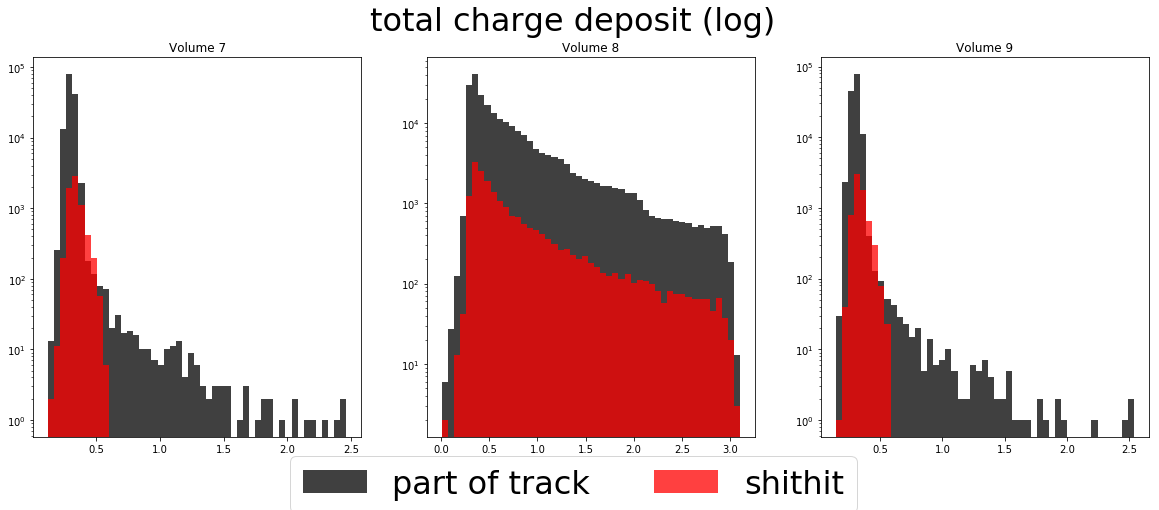

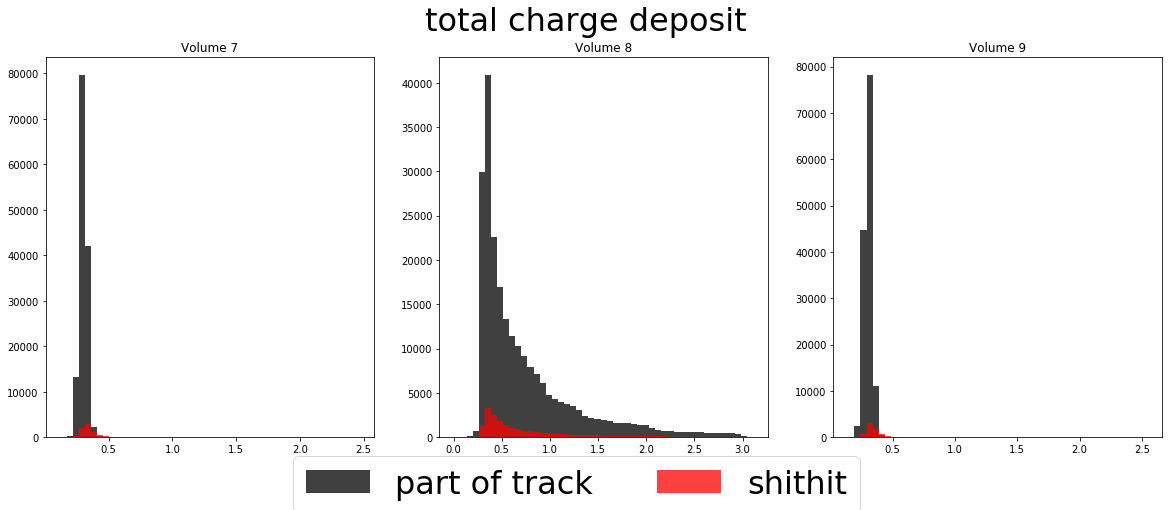

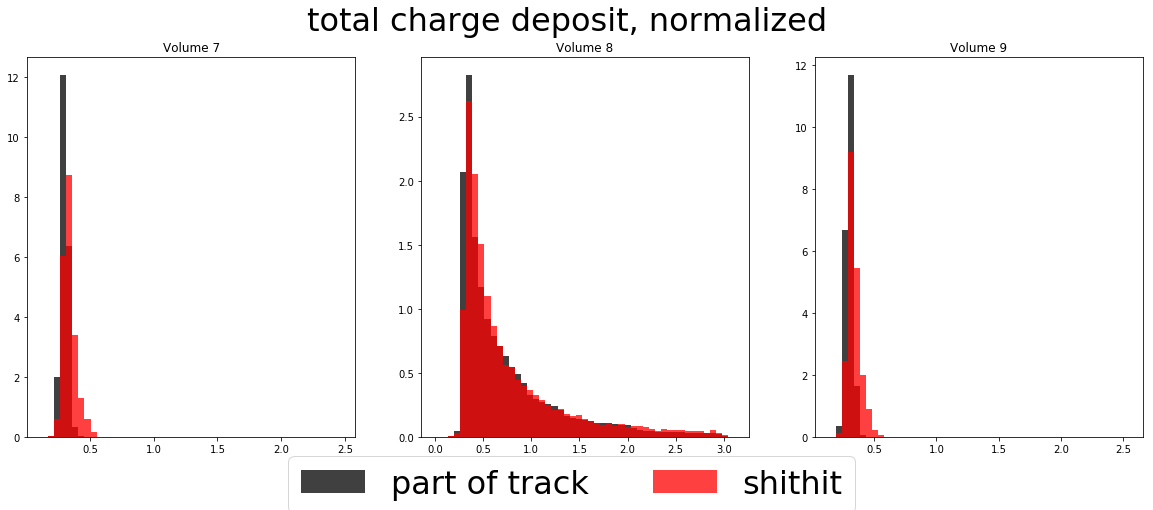

In [11]:
plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("total charge deposit (log)",fontsize=32)
volume=0
volume_name=["7","8","9"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    plt.yscale('log')
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,sum(cells_hit_ch[ev][volume][j].values[:,3]))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,sum(cells_shithit_ch[ev][volume][j].values[:,3]))
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),50)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)

plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("total charge deposit",fontsize=32)
volume=0
volume_name=["7","8","9"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,sum(cells_hit_ch[ev][volume][j].values[:,3]))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,sum(cells_shithit_ch[ev][volume][j].values[:,3]))
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),50)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)

plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("total charge deposit, normalized",fontsize=32)
volume=0
volume_name=["7","8","9"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,sum(cells_hit_ch[ev][volume][j].values[:,3]))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,sum(cells_shithit_ch[ev][volume][j].values[:,3]))
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),50)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75,normed=True)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75,normed=True)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)


average charge deposit:

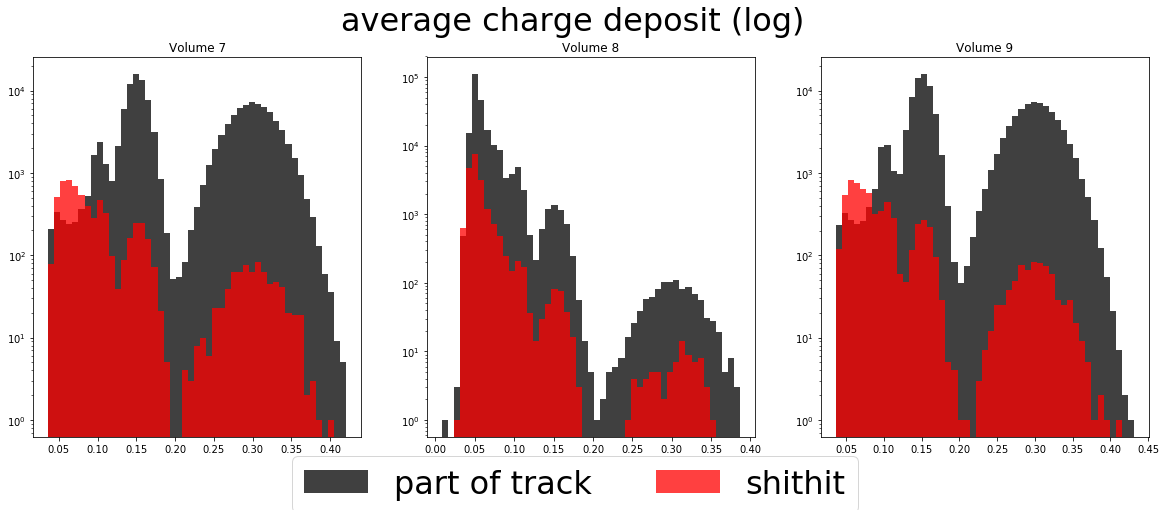

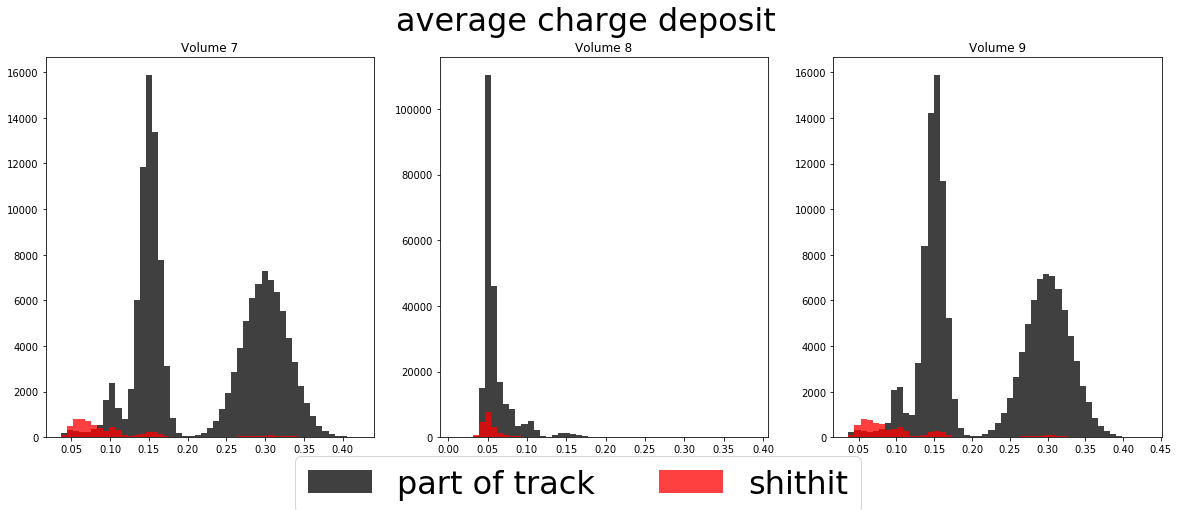

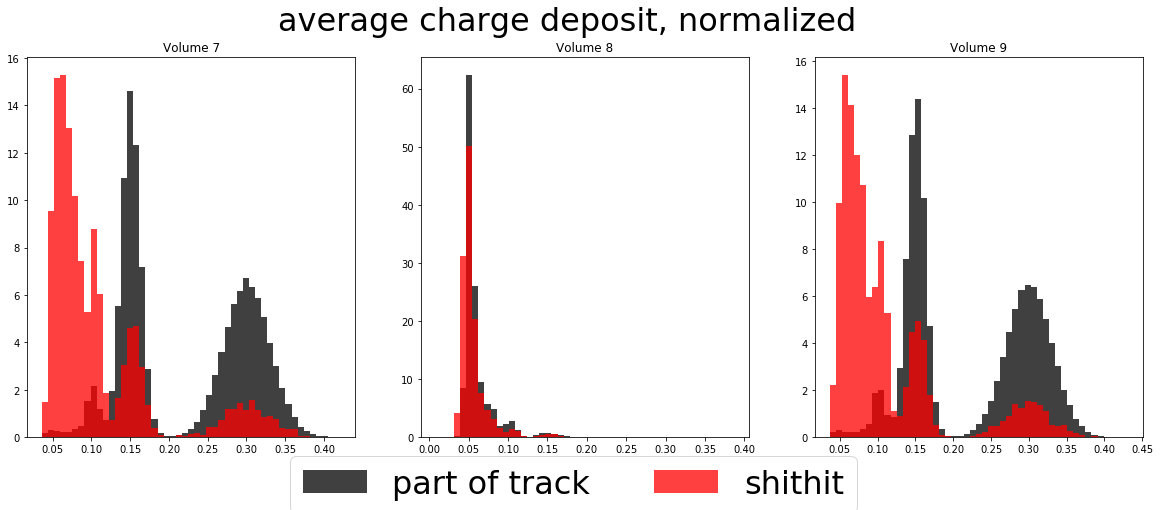

In [12]:
plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("average charge deposit (log)",fontsize=32)
volume=0
volume_name=["7","8","9","12","13","14","16","17","18"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    plt.yscale('log')
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,sum(cells_hit_ch[ev][volume][j].values[:,3])/len(cells_hit_ch[ev][volume][j]))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,sum(cells_shithit_ch[ev][volume][j].values[:,3])/len(cells_shithit_ch[ev][volume][j]))
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),50)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)

plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("average charge deposit",fontsize=32)
volume=0
volume_name=["7","8","9","12","13","14","16","17","18"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,sum(cells_hit_ch[ev][volume][j].values[:,3])/len(cells_hit_ch[ev][volume][j]))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,sum(cells_shithit_ch[ev][volume][j].values[:,3])/len(cells_shithit_ch[ev][volume][j]))
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),50)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)

plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("average charge deposit, normalized",fontsize=32)
volume=0
volume_name=["7","8","9","12","13","14","16","17","18"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,sum(cells_hit_ch[ev][volume][j].values[:,3])/len(cells_hit_ch[ev][volume][j]))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,sum(cells_shithit_ch[ev][volume][j].values[:,3])/len(cells_shithit_ch[ev][volume][j]))
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),50)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75, normed=True)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75,normed=True)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)


maximal charge deposit:

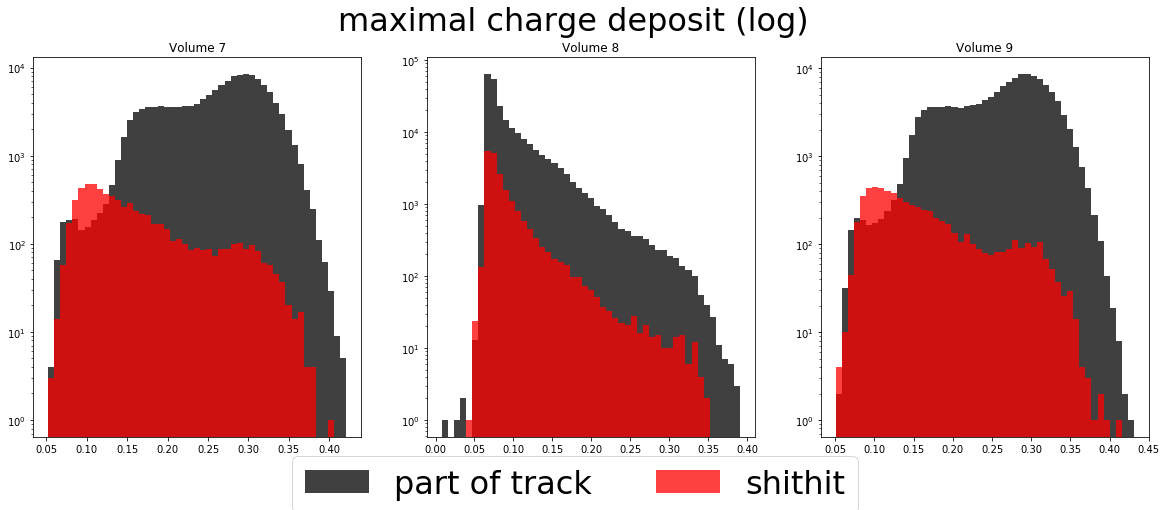

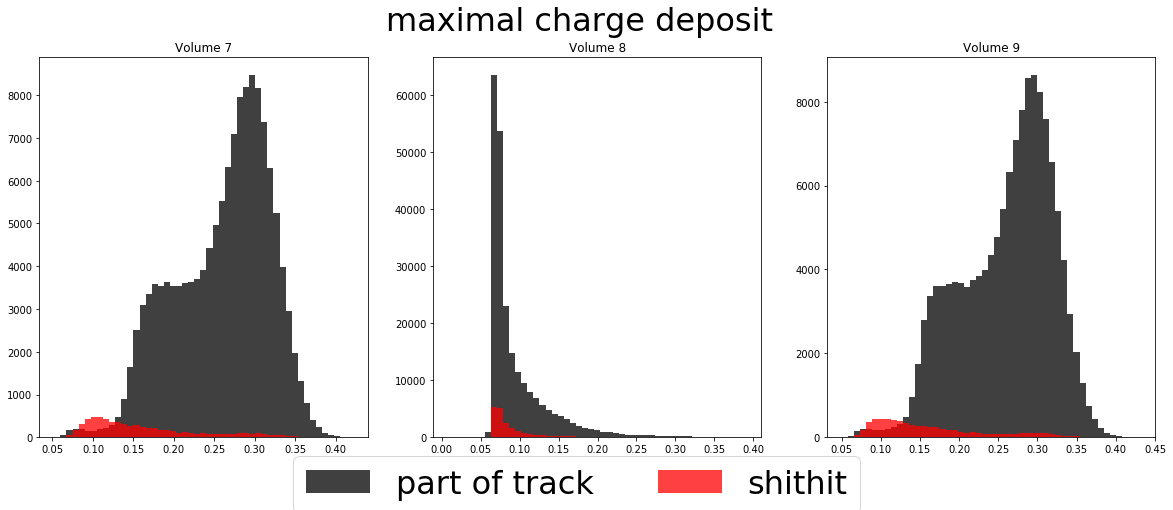

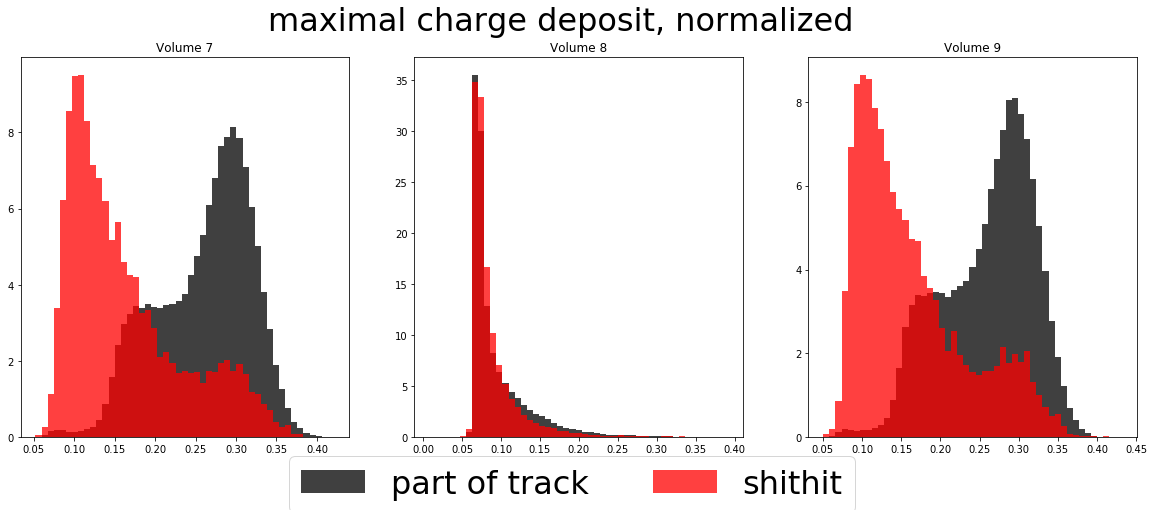

In [13]:
plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("maximal charge deposit (log)",fontsize=32)
volume=0
volume_name=["7","8","9","12","13","14","16","17","18"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    plt.yscale('log')
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,max(cells_hit_ch[ev][volume][j].values[:,3]))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,max(cells_shithit_ch[ev][volume][j].values[:,3]))
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),50)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)

plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("maximal charge deposit",fontsize=32)
volume=0
volume_name=["7","8","9","12","13","14","16","17","18"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,max(cells_hit_ch[ev][volume][j].values[:,3]))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,max(cells_shithit_ch[ev][volume][j].values[:,3]))
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),50)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)

plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("maximal charge deposit, normalized",fontsize=32)
volume=0
volume_name=["7","8","9","12","13","14","16","17","18"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,max(cells_hit_ch[ev][volume][j].values[:,3]))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,max(cells_shithit_ch[ev][volume][j].values[:,3]))
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),50)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75, normed=True)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75,normed=True)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)


maximal charge deposit, normalized to average:

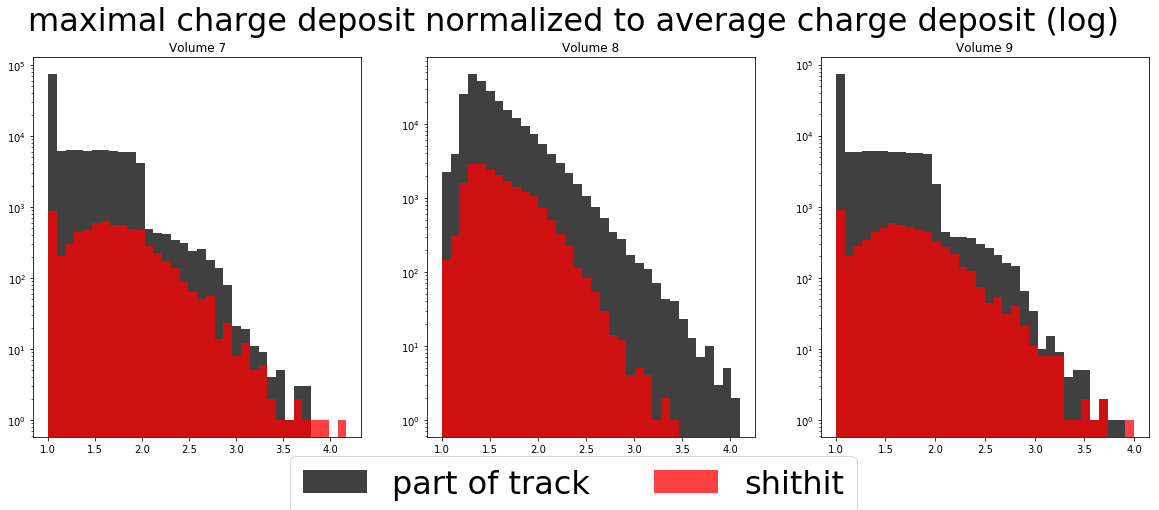

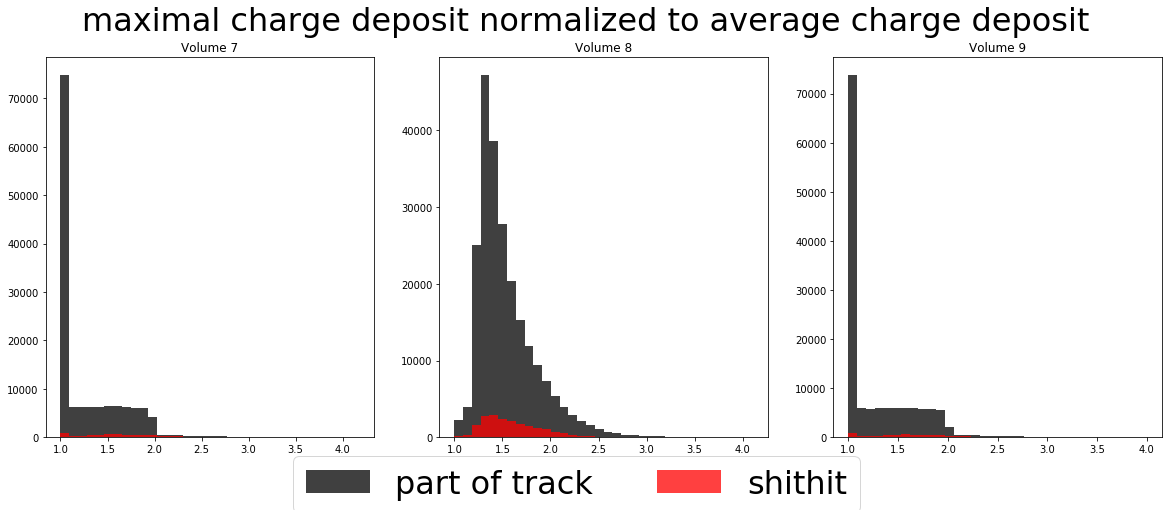

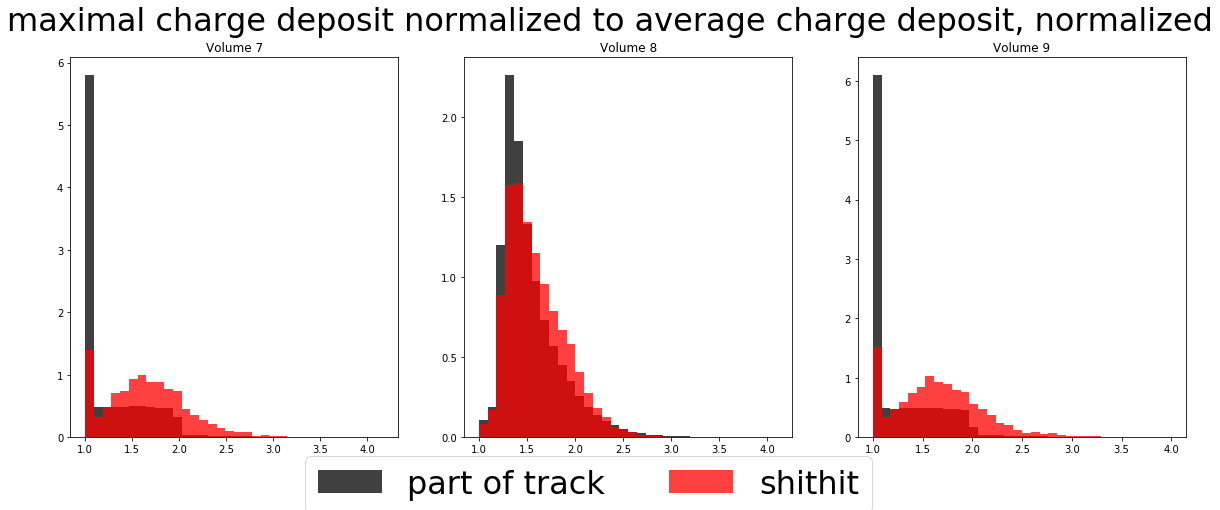

In [13]:
plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("maximal charge deposit normalized to average charge deposit (log)",fontsize=32)
volume=0
volume_name=["7","8","9","12","13","14","16","17","18"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    plt.yscale('log')
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,max(cells_hit_ch[ev][volume][j].values[:,3])/(sum(cells_hit_ch[ev][volume][j].values[:,3])/len(cells_hit_ch[ev][volume][j])))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,max(cells_shithit_ch[ev][volume][j].values[:,3])/(sum(cells_shithit_ch[ev][volume][j].values[:,3])/len(cells_shithit_ch[ev][volume][j])))
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),35)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)

plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("maximal charge deposit normalized to average charge deposit",fontsize=32)
volume=0
volume_name=["7","8","9","12","13","14","16","17","18"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,max(cells_hit_ch[ev][volume][j].values[:,3])/(sum(cells_hit_ch[ev][volume][j].values[:,3])/len(cells_hit_ch[ev][volume][j])))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,max(cells_shithit_ch[ev][volume][j].values[:,3])/(sum(cells_shithit_ch[ev][volume][j].values[:,3])/len(cells_shithit_ch[ev][volume][j])))
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),35)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)

plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("maximal charge deposit normalized to average charge deposit, normalized",fontsize=32)
volume=0
volume_name=["7","8","9","12","13","14","16","17","18"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,max(cells_hit_ch[ev][volume][j].values[:,3])/(sum(cells_hit_ch[ev][volume][j].values[:,3])/len(cells_hit_ch[ev][volume][j])))
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,max(cells_shithit_ch[ev][volume][j].values[:,3])/(sum(cells_shithit_ch[ev][volume][j].values[:,3])/len(cells_shithit_ch[ev][volume][j])))
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),35)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75,normed=True)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75,normed=True)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)

charge deposit per cell (NOT per hit):

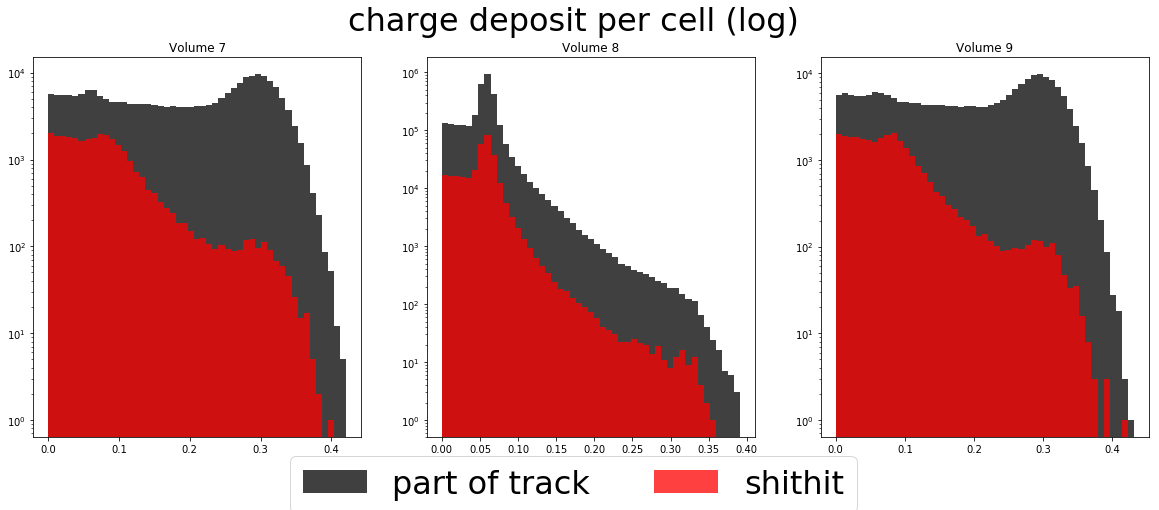

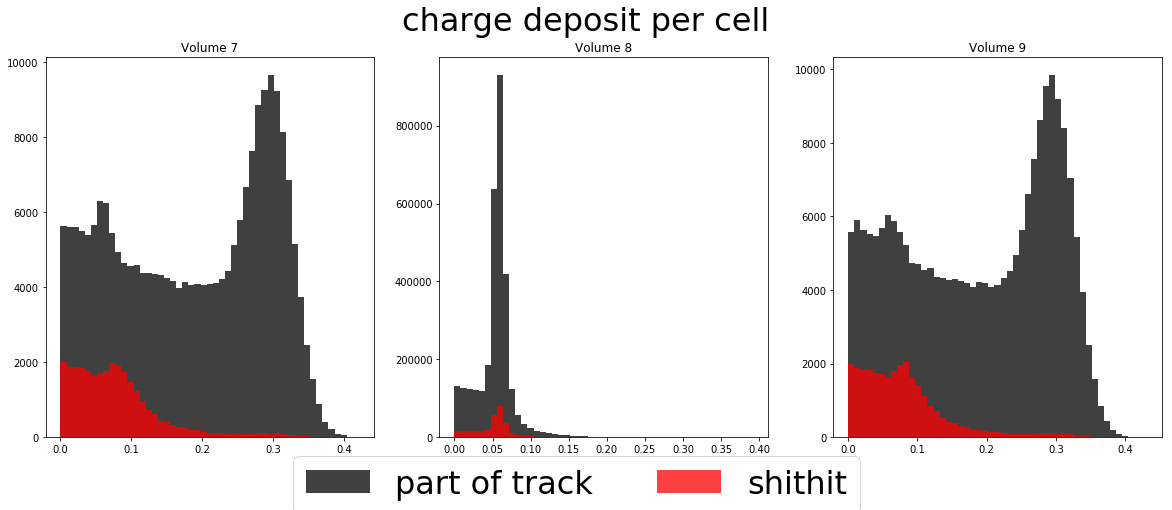

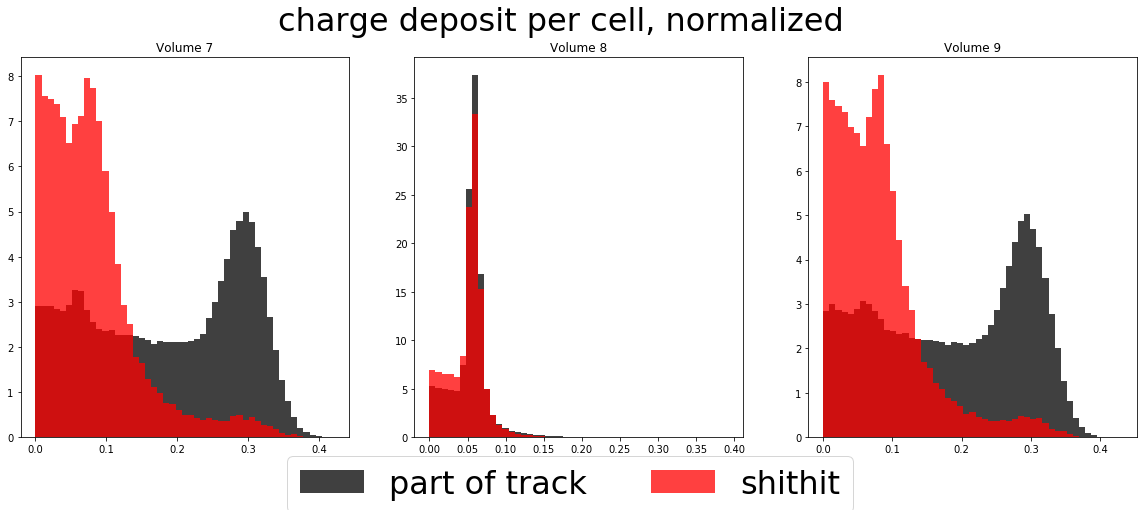

In [12]:
plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("charge deposit per cell (log)",fontsize=32)
volume=0
volume_name=["7","8","9"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    plt.yscale('log')
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,cells_hit_ch[ev][volume][j].values[:,3])
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,cells_shithit_ch[ev][volume][j].values[:,3])
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),50)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)

plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("charge deposit per cell",fontsize=32)
volume=0
volume_name=["7","8","9"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,cells_hit_ch[ev][volume][j].values[:,3])
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,cells_shithit_ch[ev][volume][j].values[:,3])
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),50)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)

plt.figure(figsize=(20,7),facecolor='white')
plt.suptitle("charge deposit per cell, normalized",fontsize=32)
volume=0
volume_name=["7","8","9"]
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    hit_q_ch=[]
    shithit_q_ch=[]
    for ev in np.arange(NR_ev):
        for j in np.arange(len(cells_hit_ch[ev][volume])):
            hit_q_ch=np.append(hit_q_ch,cells_hit_ch[ev][volume][j].values[:,3])
        for j in np.arange(len(cells_shithit_ch[ev][volume])):
            shithit_q_ch=np.append(shithit_q_ch,cells_shithit_ch[ev][volume][j].values[:,3])
    bins=np.linspace(min(hit_q_ch.min(),shithit_q_ch.min()),max(hit_q_ch.max(),shithit_q_ch.max()),50)
    plt.hist(hit_q_ch,bins,fc='k',label='trackhit',alpha=0.75, normed=True)
    plt.hist(shithit_q_ch,bins,fc='r',label='shithit',alpha=0.75, normed=True)
    plt.title("Volume "+volume_name[volume])
    volume = volume + 1
plt.figlegend(("part of track","shithit"),loc=(0.25,-0.005),ncol=2,fontsize=32)
